## Gap Analysis Part 3 - Gap Measurement for Every Hour

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import seaborn as sns; sns.set()

In [3]:
# Load the data
time_count = pd.read_csv('jsons_summary.csv')
time_count.columns = ["", "response_time_stamp", "veh_count", "veh_str_len", "filename"]
time_count = time_count[['response_time_stamp', 'veh_count', 'veh_str_len', 'filename']]
time_count.head()

,response_time_stamp,veh_count,veh_str_len,filename
0,2015-11-01T23:59:46.108-05:00,573,5118969,2015_11_02_nyct
1,2015-11-02T00:00:52.900-05:00,572,5125493,2015_11_02_nyct
2,2015-11-02T00:01:57.458-05:00,574,5115853,2015_11_02_nyct
3,2015-11-02T00:03:01.498-05:00,580,5210647,2015_11_02_nyct
4,2015-11-02T00:04:27.375-05:00,570,5054389,2015_11_02_nyct


In [4]:
# Change the response_time_stamp type from sting to datetime
time_count['response_time_stamp'] = pd.to_datetime(time_count.response_time_stamp)
time_count['source'] = time_count.filename.str[11:]
time_count.sort_values(['source','response_time_stamp'],inplace=True)
time_count.head()

,response_time_stamp,veh_count,veh_str_len,filename,source
25976,2015-01-01 05:00:02.813,135,649833,2015_01_01_bc,bc
25977,2015-01-01 05:01:02.361,134,655039,2015_01_01_bc,bc
25978,2015-01-01 05:02:02.142,135,666904,2015_01_01_bc,bc
25979,2015-01-01 05:03:01.824,131,674832,2015_01_01_bc,bc
25980,2015-01-01 05:04:02.627,131,686519,2015_01_01_bc,bc


In [5]:
time_count['time'] = time_count.response_time_stamp.apply(str)
time_count.head()

,response_time_stamp,veh_count,veh_str_len,filename,source,time
25976,2015-01-01 05:00:02.813,135,649833,2015_01_01_bc,bc,2015-01-01 05:00:02.813000
25977,2015-01-01 05:01:02.361,134,655039,2015_01_01_bc,bc,2015-01-01 05:01:02.361000
25978,2015-01-01 05:02:02.142,135,666904,2015_01_01_bc,bc,2015-01-01 05:02:02.142000
25979,2015-01-01 05:03:01.824,131,674832,2015_01_01_bc,bc,2015-01-01 05:03:01.824000
25980,2015-01-01 05:04:02.627,131,686519,2015_01_01_bc,bc,2015-01-01 05:04:02.627000


In [6]:
time1 = time_count['time']
time = map(lambda x:x[11:13], time1)
date = map(lambda x:x[:10], time1)
time_count['hour'] = time
time_count['date'] = date
time_count.head()

,response_time_stamp,veh_count,veh_str_len,filename,source,time,hour,date
25976,2015-01-01 05:00:02.813,135,649833,2015_01_01_bc,bc,2015-01-01 05:00:02.813000,05,2015-01-01
25977,2015-01-01 05:01:02.361,134,655039,2015_01_01_bc,bc,2015-01-01 05:01:02.361000,05,2015-01-01
25978,2015-01-01 05:02:02.142,135,666904,2015_01_01_bc,bc,2015-01-01 05:02:02.142000,05,2015-01-01
25979,2015-01-01 05:03:01.824,131,674832,2015_01_01_bc,bc,2015-01-01 05:03:01.824000,05,2015-01-01
25980,2015-01-01 05:04:02.627,131,686519,2015_01_01_bc,bc,2015-01-01 05:04:02.627000,05,2015-01-01


In [7]:
time_count['weekday'] = time_count['response_time_stamp'].apply(datetime.weekday)
time_count.head()

,response_time_stamp,veh_count,veh_str_len,filename,source,time,hour,date,weekday
25976,2015-01-01 05:00:02.813,135,649833,2015_01_01_bc,bc,2015-01-01 05:00:02.813000,05,2015-01-01,3
25977,2015-01-01 05:01:02.361,134,655039,2015_01_01_bc,bc,2015-01-01 05:01:02.361000,05,2015-01-01,3
25978,2015-01-01 05:02:02.142,135,666904,2015_01_01_bc,bc,2015-01-01 05:02:02.142000,05,2015-01-01,3
25979,2015-01-01 05:03:01.824,131,674832,2015_01_01_bc,bc,2015-01-01 05:03:01.824000,05,2015-01-01,3
25980,2015-01-01 05:04:02.627,131,686519,2015_01_01_bc,bc,2015-01-01 05:04:02.627000,05,2015-01-01,3


In [9]:
count_hour = time_count.groupby(['weekday','hour']).sum()
count_hour.head()

veh_count  veh_str_len
weekday hour                        
0       00      3888115  24150079879
        01      3357079  21077657377
        02      2959859  18954141310
        03      2558692  16453669236
        04      2047670  13255897179

In [14]:
count_hour.to_csv('count_hour.csv')

In [15]:
count_hour = pd.read_csv('count_hour.csv')
count_hour = count_hour[['weekday', 'hour', 'veh_count']]
count_hour.head()

,weekday,hour,veh_count
0,0,0,3888115
1,0,1,3357079
2,0,2,2959859
3,0,3,2558692
4,0,4,2047670


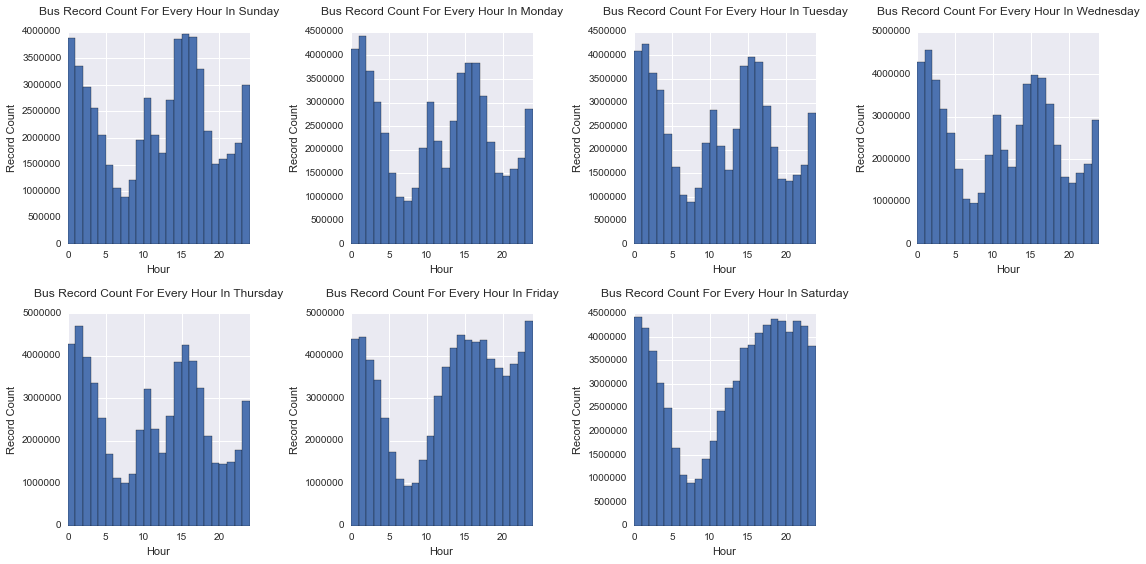

In [16]:
# Plot the data
weekdaylist = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
fig = plt.figure(figsize=(16,8))

for i in range(0,7):
    count_tmp = count_hour[count_hour['weekday'] == i]
    #fig = plt.figure(figsize=(12,8))
    ctdatetmp = count_tmp.hour
    ctbustmp  = count_tmp.veh_count
    ax = fig.add_subplot(2,4,i+1)
    ax.bar(ctdatetmp, ctbustmp, width=1)
    ax.set_xlabel('Hour')
    ax.set_ylabel('Record Count')
    ax.set_xlim(0,24)
    ax.set_title('Bus Record Count For Every Hour In '+ weekdaylist[i]+'\n')

fig.tight_layout()